In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
class Perceptron:
    def __init__(self, eta = 0.01, n_iter = 10):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        for epoch in range(0, self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0)
            self.errors_.append(errors)
        return self
        
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)
        

In [38]:
data = pd.read_csv('iris.csv', header=None)

In [34]:
X = data.iloc[:100, [0, 2]].values
y = data.iloc[:100, -1].values
y = np.where(y == 'Iris-setosa', 1, -1)

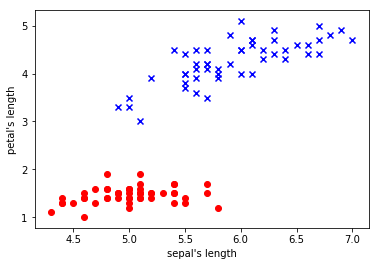

In [37]:
plt.scatter(X[:50, 0], X[:50, 1], color = 'red', marker='o')
plt.scatter(X[50:, 0], X[50:, 1], color = 'blue', marker='x')
plt.xlabel("sepal's length")
plt.ylabel("petal's length")
plt.show()

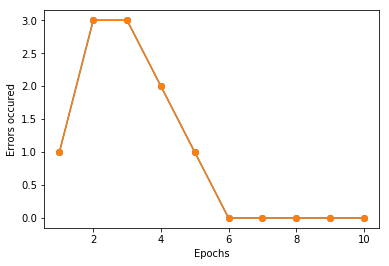

In [54]:
p = Perceptron(eta=0.1, n_iter=10)
p.fit(X, y)
plt.plot(range(1, len(p.errors_) + 1), p.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Errors occured')
plt.show()

In [55]:
p.predict([5.7, 4.2])

array(-1)